In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv("student-data.csv")

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [7]:
data.shape

(395, 31)

In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [9]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [13]:
data['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [15]:
data['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

In [41]:
target=data['passed']
features=data.drop('passed',axis=1)

In [42]:
target.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

In [43]:
features_output=pd.DataFrame(index=features.index)
for col,col_data in features.iteritems():
    
    if col_data.dtype==object:
        col_data=col_data.replace(['yes','no'],[1,0])
    if col_data.dtype==object:
        col_data=pd.get_dummies(col_data,prefix=col)
    features_output=features_output.join(col_data)


In [44]:
features_output.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


In [50]:
target1=target

### Since the target values are categorical labels, we will encode them to numeric values to work with

In [51]:
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import LabelEncoder as le

In [52]:
#target=target.replace(['yes','no'],[1,0])

In [73]:
le1=le()
target1=le1.fit_transform(target1)
print(target1[:5])
print(target[:5])

[0 0 1 1 1]
0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [77]:
def applymodel(model):
    features_train,features_test,target_train,target_test=train_test_split(features_output,target1,test_size=.25,random_state=10)
    model.fit(features_train,target_train)
    print("Model: ",model)
    print("Accuracy: ",accuracy_score(target_test,model.predict(features_test)))
    print("Precision: ",precision_score(target_test,model.predict(features_test)))
    print("Recall: ",recall_score(target_test,model.predict(features_test)))
    print("F1 Score: ",f1_score(target_test,model.predict(features_test)))
    #print("AUC: ",auc(target_test,model.predict(features_test)))

In [78]:
logreg=LogisticRegression()
applymodel(logreg)

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy:  0.727272727273
Precision:  0.759493670886
Recall:  0.882352941176
F1 Score:  0.816326530612


In [79]:
nb=GaussianNB()
applymodel(nb)

Model:  GaussianNB(priors=None)
Accuracy:  0.686868686869
Precision:  0.753424657534
Recall:  0.808823529412
F1 Score:  0.780141843972


In [80]:
svm=SVC()
applymodel(svm)

Model:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy:  0.69696969697
Precision:  0.711111111111
Recall:  0.941176470588
F1 Score:  0.810126582278


In [81]:
dt=DecisionTreeClassifier()
applymodel(dt)

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy:  0.585858585859
Precision:  0.714285714286
Recall:  0.661764705882
F1 Score:  0.687022900763


In [84]:
rf=RandomForestClassifier()
applymodel(rf)

Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy:  0.626262626263
Precision:  0.718309859155
Recall:  0.75
F1 Score:  0.73381294964


In [82]:
corr=data.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


### Check for overfitting

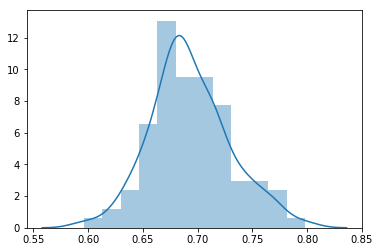

In [90]:
model_acc=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(features_output,target1,test_size=.25)
    clf=SVC()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    model_acc.append(score)

sns.distplot(model_acc)

### Cross Validation

In [95]:
from sklearn.cross_validation import cross_val_score

def crossValidation(model,features,target):
    scores=cross_val_score(model,features,target,cv=10)
    sns.distplot(scores)
    


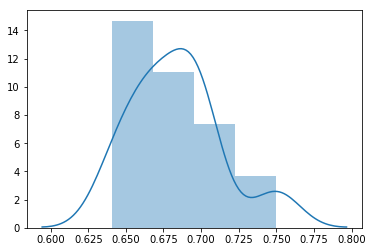

In [97]:
rf=SVC()
crossValidation(rf,features_output,target1)

### Select Best Parameters

In [102]:
from sklearn.grid_search import GridSearchCV

def gridSearch(model,params,features,target,cv):
    grid_search=GridSearchCV(model,params,cv=cv)
    grid_search.fit(features,target)
    print("Best Score: ",grid_search.best_score_)
    print("Best Parameters: ",grid_search.best_params_)

In [103]:
svc=SVC()
params={'kernel':['rbf','linear'],'C':[1,10,100,200,300,400,500],'gamma':[1e-2,1e-3,1e-4,1e-5]}
gridSearch(svc,params,features_output,target1,10)

Best Score:  0.7139240506329114
Best Parameters:  {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
